##                                                  Saioni  Chatterjee
##                                        Predicting Employee Attrition


### Exploratory Data Analysis Made
#### The age group of the employees is concentrated between 25-40 years
#### Attrition is highly likely for youngers and with females
#### Attrition is likely for employeers who travel rarely or doesn't travel at all
#### Employees in Sales Department tend to leave more than others
#### Employees with comparitively low monthly income tend to leave
#### Attrition is higher for employees with high education
#### Attrition is likely with employees having low job involvement
#### Dataset is highly imbalanced where 83% have not left the company and 17% have left

### Classification Report 

In [33]:
print('------------------CLASSIFICATION REPORT---------------------')
df

------------------CLASSIFICATION REPORT---------------------


,Model,Accuracy,ROC-AUC Accuracy
0,RandomForest (original dataset),45.02,-
1,RandomForest (Upsampled Dataset),98.70,62
2,RandomForest(Downsampled Dataset),77.58,-
3,ANN,86.12,69
4,Logistic Regression (Original Dataset),87.3,62
5,Logistic Regression (Upsampled Dataset),72.5,76
6,Logistic Regression (Downsampled dataset),72.1,74


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset=pd.read_csv('C:/Users/dell/Desktop/Data science Internship/DS_Internship_Task_Week-1/DS_Internship_Task_Week-1_/Data-Science-Internship/Week2 - Employee Attrition/EmployeeAttrition.csv')
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [81]:
dataset.shape

(1470, 35)

In [82]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [5]:
dataset.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [3]:
dataset=dataset.drop('StandardHours',axis=1)

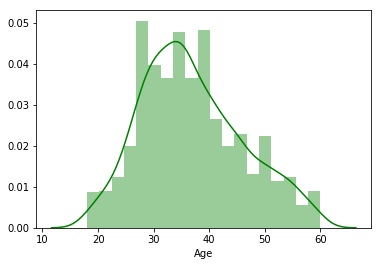

In [12]:
sb.distplot(dataset['Age'],color='g')

In [9]:
#age between 28-40 (most people)

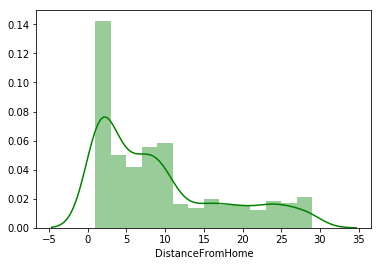

In [13]:
sb.distplot(dataset['DistanceFromHome'],color='g')

In [14]:
#Most of the people within 10km

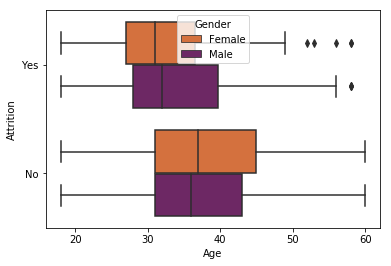

In [22]:
sb.boxplot(x="Age", y="Attrition", hue="Gender",data=dataset, palette="inferno_r")

In [23]:
#Younger employees tend to leave more than older ones and attrition is more likely with the females

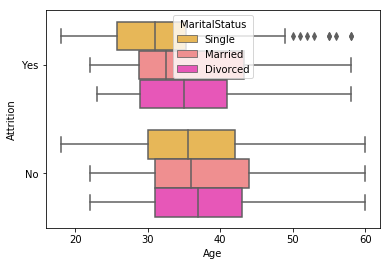

In [41]:
sb.boxplot(x="Age", y="Attrition", hue="MaritalStatus",data=dataset, palette="spring_r")

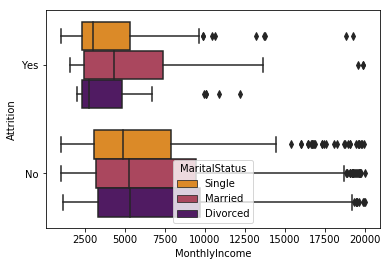

In [42]:
sb.boxplot(x="MonthlyIncome", y="Attrition",hue="MaritalStatus",data=dataset, palette="inferno_r")

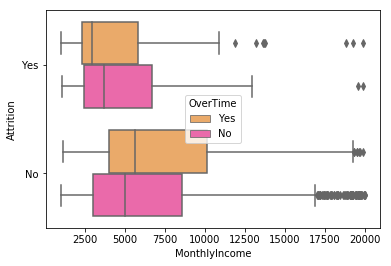

In [40]:
sb.boxplot(x="MonthlyIncome", y="Attrition",hue="OverTime",data=dataset, palette="spring_r")

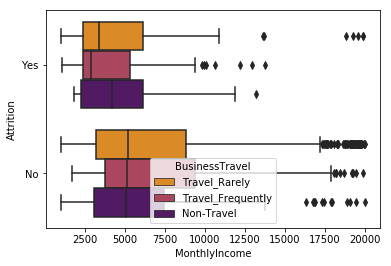

In [43]:
sb.boxplot(x="MonthlyIncome", y="Attrition",hue="BusinessTravel",data=dataset, palette="inferno_r")

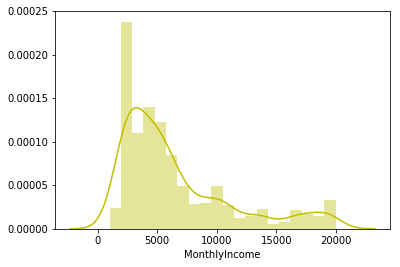

In [49]:
sb.distplot(dataset['MonthlyIncome'],color='y')

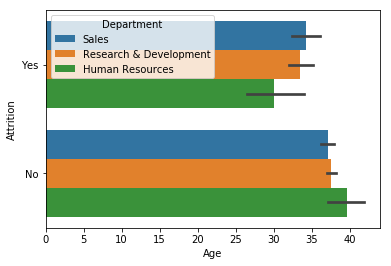

In [57]:
sb.barplot(x='Age',y='Attrition',hue='Department',data=dataset)

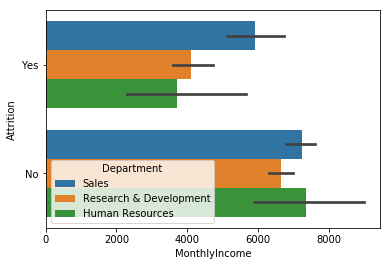

In [58]:
sb.barplot(x='MonthlyIncome',y='Attrition',hue='Department',data=dataset)

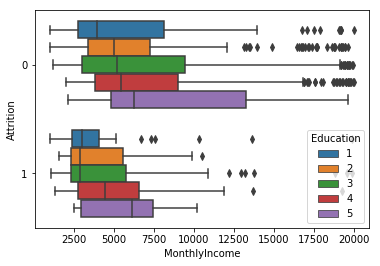

In [67]:
sb.boxplot(dataset['MonthlyIncome'],dataset['Attrition'],dataset['Education'])

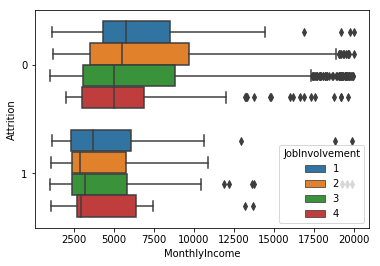

In [68]:
sb.boxplot(dataset['MonthlyIncome'],dataset['Attrition'],dataset['JobInvolvement'])

In [4]:
df=dataset[['Age','DailyRate','HourlyRate','MonthlyIncome','MonthlyRate','PercentSalaryHike','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','NumCompaniesWorked']]

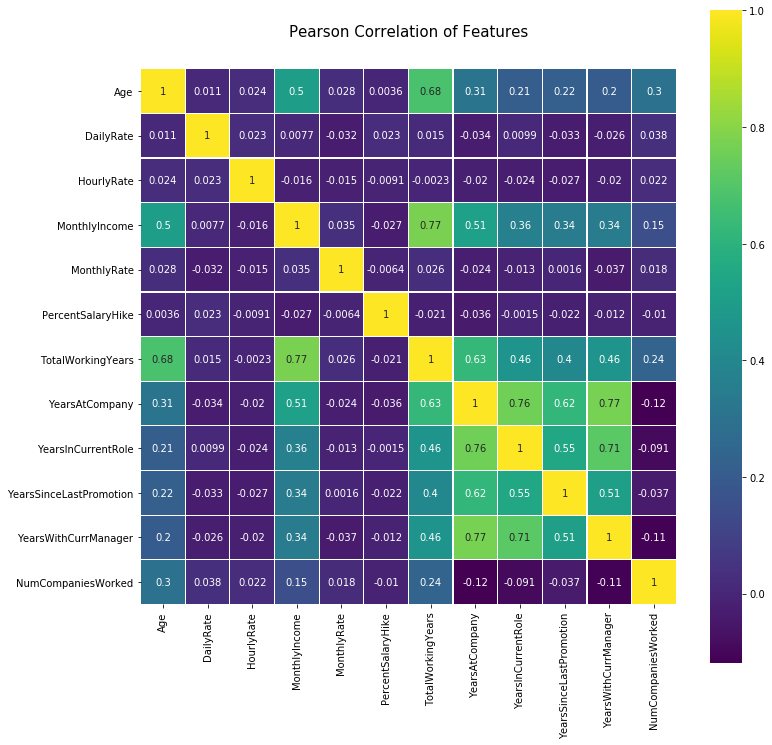

In [46]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(df.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

## Pre-Processing
### One-hot encoding of categorical values

In [4]:
dataset['JobRole']=dataset['JobRole'].astype('category')
dummies=pd.get_dummies(dataset['JobRole'],prefix='JobRole')
dataset = pd.concat([dataset, dummies], axis=1)
del dataset['JobRole']

In [5]:
dataset['Gender']=dataset['Gender'].astype('category')
dummies=pd.get_dummies(dataset['Gender'],prefix='Gender')
dataset = pd.concat([dataset, dummies], axis=1)
del dataset['Gender']

In [6]:
dataset['EducationField']=dataset['EducationField'].astype('category')
dummies=pd.get_dummies(dataset['EducationField'],prefix='EducationField')
dataset = pd.concat([dataset, dummies], axis=1)
del dataset['EducationField']

In [7]:
dataset['Department']=dataset['Department'].astype('category')
dummies=pd.get_dummies(dataset['Department'],prefix='Department')
dataset = pd.concat([dataset, dummies], axis=1)
del dataset['Department']

In [8]:
dataset['MaritalStatus']=dataset['MaritalStatus'].astype('category')
dummies=pd.get_dummies(dataset['MaritalStatus'],prefix='MaritalStatus')
dataset = pd.concat([dataset, dummies], axis=1)
del dataset['MaritalStatus']

In [9]:
del dataset['Over18']
# This attribute did not seem to contribute much information on attrition 

In [10]:
dataset['Attrition']=dataset['Attrition'].replace(['Yes', 'No'], [1,0]) 
dataset['Attrition']=dataset['Attrition'].astype('category')
dataset['OverTime']=dataset['OverTime'].replace(['No','Yes'], [0,1])
dataset['BusinessTravel']=dataset['BusinessTravel'].replace(['Non-Travel','Travel_Rarely','Travel_Frequently'], [0,1,2]) 

In [11]:
dataset.head(3)

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,...,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Department_Human Resources,Department_Research & Development,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,1102,1,2,1,1,2,94,...,0,0,0,0,0,0,1,0,0,1
1,49,0,2,279,8,1,1,2,3,61,...,0,0,0,0,0,1,0,0,1,0
2,37,1,1,1373,2,2,1,4,4,92,...,0,0,1,0,0,1,0,0,0,1


In [12]:
(dataset['Attrition'].value_counts()/1470)*100

0    83.877551
1    16.122449
Name: Attrition, dtype: float64

In [11]:
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree

In [12]:
train, test = sklearn.model_selection.train_test_split(dataset, train_size = 0.75,random_state=52)
print("For Main Data Set :",dataset['Attrition'].count())
print("For Train Set :",train['Attrition'].count())
print("For Test Set :",test['Attrition'].count())

x_train=train.drop(train.columns[1], axis = 1)
x_test=test.drop(test.columns[1], axis = 1)
y_train=train['Attrition']
y_test=test['Attrition']

For Main Data Set : 1470
For Train Set : 1102
For Test Set : 368


# Decision Tree

The top accuracy forecast with cross validation is 84.2%
Obtained with min_impurity_decrease = 0.0


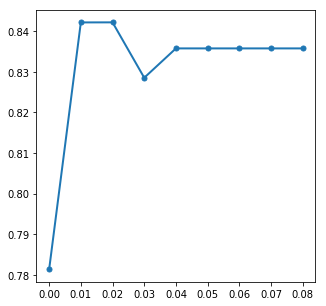

In [25]:
r_state=52
avg_scores = []
parameter_values = np.arange(0,0.09, 0.01)
for mid in parameter_values:
    estimator = tree.DecisionTreeClassifier(criterion="entropy", random_state = r_state, min_impurity_decrease = mid)
    scores = cross_val_score(estimator, x_train, y_train, scoring='accuracy', cv = 10)
    avg_scores.append(np.mean(scores))
#print(avg_scores)

plt.figure(figsize=(5,5))
plt.plot(parameter_values, avg_scores, '-o', linewidth=2, markersize=5)
print("The top accuracy forecast with cross validation is {0:.1f}%".format(avg_scores[np.argmax(avg_scores)]*100))
print("Obtained with min_impurity_decrease = {0:.1f}".format(parameter_values[np.argmax(avg_scores)]))

In [23]:
estimator = tree.DecisionTreeClassifier(criterion="entropy", random_state = r_state,
                                        min_impurity_decrease = 0.02)

In [24]:
estimator.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.02, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=52,
            splitter='best')

In [25]:
estimator.score(x_test,y_test)

0.842391304347826

# Random Forest Classifier

In [54]:
(dataset['Attrition'].value_counts()/1470)*100

0    83.877551
1    16.122449
Name: Attrition, dtype: float64

### Dataset is imbalanced as Employee leaving the company is only 16%, where as Not leaving is 83%
### Working with this split will not give a proper/ considerable accuracy score

In [13]:
from sklearn.utils import resample
X_train_u, y_train_u = resample(x_train[y_train == 1],
                               y_train[y_train == 1],
                               replace = True, # sample with replacement
                               n_samples = x_train[y_train == 0].shape[0], # to match majority class
                               random_state = 1)
X_train_u = np.concatenate((x_train[y_train == 0], X_train_u))
y_train_u = np.concatenate((y_train[y_train == 0], y_train_u))

#Downsample majority class
X_train_d, y_train_d = resample(x_train[y_train == 0],
                               y_train[y_train == 0],
                               replace = True, # sample with replacement
                               n_samples = x_train[y_train == 1].shape[0], # to match majority class
                               random_state = 1)
X_train_d = np.concatenate((x_train[y_train == 1], X_train_d))
y_train_d = np.concatenate((y_train[y_train == 1], y_train_d))

### Upsampling is training on high subset of minority class (Attrition as YES)
### Downsampling is training on low subset of majority class (Attrition as NO)

### Random Forest is an ensemble learning method, flexible and easy to use. Instead of searching for the most important feature while splitting a node, it searches for the best feature among a random subset of features. This results in a wide diversity that generally results in a better model 

### Pipelines are a way to run multiple processes in the order that they are listed.The purpose of pipeline is to assemble several steps that can be cross-validated together while setting different parameters. In the model below we set Standard Scalar and Random Forest Classifier 

### Grid searching is a module that performs parameter tuning which is the process of selecting values for a model's parameter that maximize the accuracy of the model. Grid search does this by fitting every combination of parameters and selecting the best parameters by which model has the best score 

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#random forest
# Build random forest classifier
methods_data = {"Original": (x_train, y_train),
                "Upsampled": (X_train_u, y_train_u),
                "Downsampled": (X_train_d, y_train_d)}
for method in methods_data.keys():
    pip_rf = make_pipeline(StandardScaler(),
                           RandomForestClassifier(n_estimators=500,
                                                  class_weight="balanced",
                                                  random_state=123))
    
    hyperparam_grid = {
        "randomforestclassifier__n_estimators": [10, 50, 100, 500],
        "randomforestclassifier__max_features": ["sqrt", "log2", 0.4, 0.5],
        "randomforestclassifier__min_samples_leaf": [1, 3, 5],
        "randomforestclassifier__criterion": ["gini", "entropy"]
    }
    
    gs_rf = GridSearchCV(pip_rf,
                         hyperparam_grid,
                         scoring="f1",
                         cv=10,
                         n_jobs=-1)
    
    gs_rf.fit(methods_data[method][0], methods_data[method][1])
    
    print(f"\033[1m\033[0mThe best hyperparameters for {method} data:")
    for hyperparam in gs_rf.best_params_.keys():
        print(hyperparam[hyperparam.find("__") + 2:], ": ", gs_rf.best_params_[hyperparam])
        
    print(f"\033[1m\033[94mBest 10-folds CV f1-score: {gs_rf.best_score_ * 100:.2f}%.")

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


The best hyperparameters for Original data:
criterion :  entropy
max_features :  log2
min_samples_leaf :  5
n_estimators :  50
Best 10-folds CV f1-score: 45.02%.


C:\Users\dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


The best hyperparameters for Upsampled data:
criterion :  entropy
max_features :  log2
min_samples_leaf :  1
n_estimators :  500
Best 10-folds CV f1-score: 98.70%.


C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


The best hyperparameters for Downsampled data:
criterion :  gini
max_features :  sqrt
min_samples_leaf :  1
n_estimators :  500
Best 10-folds CV f1-score: 77.58%.


### Here we notice that Random Forest Classifier on Upsampling dataset gives the best accuracy
### Its also noticed that running the same classifier on the imbalanced dataset couldn't produce a good accuracy, thus its recommended to balance a dataset before building a model on it

In [37]:
from sklearn.metrics import confusion_matrix
rf1 = RandomForestClassifier(criterion="entropy", max_features = "sqrt", min_samples_leaf = 1,
                             n_estimators = 100,random_state=0)
rf2 = RandomForestClassifier(criterion="entropy", max_features = "sqrt", min_samples_leaf = 1,
                             n_estimators = 100,random_state=0)
rf3 = RandomForestClassifier(criterion="entropy", max_features = "sqrt", min_samples_leaf = 1,
                             n_estimators = 100,random_state=0)
rf1.fit(x_train, y_train)
rf2.fit(X_train_u, y_train_u)
rf3.fit(X_train_d, y_train_d)
y_pred1 = rf1.predict(x_test)
y_pred2 = rf2.predict(x_test)
y_pred3 = rf3.predict(x_test)
conf_arr1 = confusion_matrix(y_test, y_pred1)
conf_arr2 = confusion_matrix(y_test, y_pred2)
conf_arr3 = confusion_matrix(y_test, y_pred3)
print('---Confusion Matrix for original data---')
print(conf_arr1)
print('---Confusion Matrix for upsampled data---')
print(conf_arr2)
print('---Confusion Matrix for downsampled data---')
print(conf_arr3)
#df_cm = pd.DataFrame(conf_arr, index = [i for i in "01"],
 #                 columns = [i for i in "01"])


---Confusion Matrix for original data---
[[312   0]
 [ 49   7]]
---Confusion Matrix for upsampled data---
[[306   6]
 [ 42  14]]
---Confusion Matrix for downsampled data---
[[219  93]
 [ 13  43]]


### Confusion matrix is the performance measurement for the classification model.
### Here, 312 (306+6) labels are predicted correctly and 56 are incorrect.

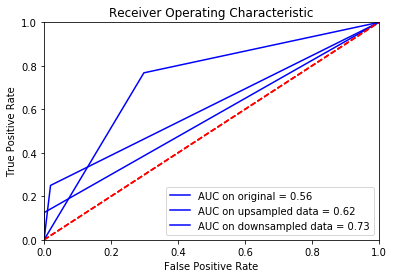

In [39]:
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc
fpr1, tpr1, thresholds = roc_curve(y_test, y_pred1)
fpr2, tpr2, thresholds = roc_curve(y_test, y_pred2)
fpr3, tpr3, thresholds = roc_curve(y_test, y_pred3)
roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
roc_auc3 = auc(fpr3, tpr3)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'AUC on original = %0.2f' % roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot(fpr2, tpr2, 'b', label = 'AUC on upsampled data = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot(fpr3, tpr3, 'b', label = 'AUC on downsampled data = %0.2f' % roc_auc3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### AUC-ROC curve tells how good the  model is in distuiguishing classes. The ROC-AUC curve value achieved here is 62% 

# ANN

In [24]:
# 70% training and 30% testing
train, val = sklearn.model_selection.train_test_split(train, train_size = 0.75,random_state=52)
x_val=val.drop(val.columns[1], axis = 1)
y_val=val['Attrition']

In [25]:
# Define the scaler 
scaler = StandardScaler().fit(x_train)

# Scale the train set
X_train = scaler.transform(x_train)

# Scale the train set
X_val = scaler.transform(x_val)

# Scale the test set
X_test = scaler.transform(x_test)

In [26]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(32,kernel_initializer='uniform', activation='relu', input_shape=(50,)))

model.add(Dense(8,kernel_initializer='uniform', activation='relu'))

# Add an output layer 
model.add(Dense(1, kernel_initializer='uniform',activation='sigmoid'))

Using TensorFlow backend.
W0611 18:10:42.845536  8396 deprecation_wrapper.py:119] From C:\Users\dell\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0611 18:10:42.885963  8396 deprecation_wrapper.py:119] From C:\Users\dell\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0611 18:10:42.895789  8396 deprecation_wrapper.py:119] From C:\Users\dell\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



### The above model is limited to 3 layers, For each layer activation type must be selected. Here, relu activation is selected as the first layer & second layer and sigmoid activation for the final layer 

### To compile the model, a loss function must be defined which is how the model evaluates its own performance. An Optimizer must also be determined, which is how the information from the cost function is used to change the weights and bias of each node. 

In [27]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
mod=model.fit(X_train, y_train,epochs=20, batch_size=32, verbose=1,validation_data=(X_val,y_val))

W0611 18:10:47.982959  8396 deprecation_wrapper.py:119] From C:\Users\dell\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0611 18:10:48.007288  8396 deprecation_wrapper.py:119] From C:\Users\dell\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0611 18:10:48.011729  8396 deprecation.py:323] From C:\Users\dell\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0611 18:10:48.196703  8396 deprecation_wrapper.py:119] From C:\Users\dell\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assig

Train on 1102 samples, validate on 276 samples
Epoch 1/20
1102/1102 [==============================] - 1s 510us/step - loss: 0.6816 - acc: 0.8358 - val_loss: 0.6629 - val_acc: 0.8297
Epoch 2/20
1102/1102 [==============================] - 0s 46us/step - loss: 0.6184 - acc: 0.8358 - val_loss: 0.5548 - val_acc: 0.8297
Epoch 3/20
1102/1102 [==============================] - 0s 36us/step - loss: 0.4692 - acc: 0.8358 - val_loss: 0.4161 - val_acc: 0.8297
Epoch 4/20
1102/1102 [==============================] - 0s 34us/step - loss: 0.3764 - acc: 0.8358 - val_loss: 0.3799 - val_acc: 0.8297
Epoch 5/20
1102/1102 [==============================] - 0s 34us/step - loss: 0.3488 - acc: 0.8358 - val_loss: 0.3619 - val_acc: 0.8297
Epoch 6/20
1102/1102 [==============================] - 0s 39us/step - loss: 0.3335 - acc: 0.8358 - val_loss: 0.3503 - val_acc: 0.8297
Epoch 7/20
1102/1102 [==============================] - 0s 36us/step - loss: 0.3217 - acc: 0.8358 - val_loss: 0.3431 - val_acc: 0.8297
Epoch 8

### Epochs determine how many iterations through the data shall be done. More Epochs can be computationally expensive, but allows for a better fit. It can be noticed here that the accuracy of the model on the training data improves after each iteration, as the optimizing function alters the weights. 
### Accuracy has varied from 84.5% - 91.79% on validation samples
### Accuracy varied from 81.94% - 90.29% on training samples

In [36]:
score = model.evaluate(X_test, y_test,verbose=1)

368/368 [==============================] - 0s 36us/step


In [37]:
y_pred = model.predict(X_test)

In [38]:
y_p=list()
for i in y_pred:
    if i>0.5:
        y_p.append(1)
    else:
        y_p.append(0)

In [39]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

# Confusion matrix
confusion_matrix(y_test, y_p)

array([[299,  13],
       [ 32,  24]], dtype=int64)

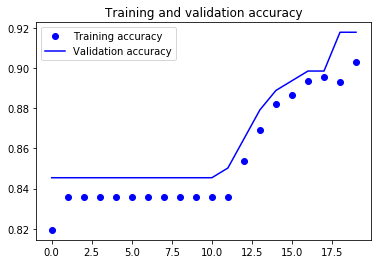

In [64]:
accuracy = mod.history['acc']
val_accuracy = mod.history['val_acc']
loss = mod.history['loss']
val_loss = mod.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

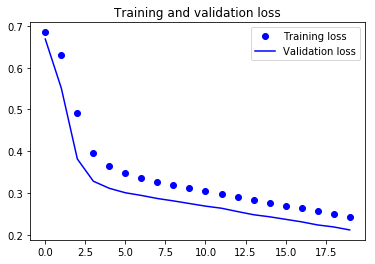

In [62]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### we notice here a good fit learning curve with minimal gap between the two final loss values.
### here, the plot of training loss decreases to the point of stability
### The plot of validation loss decreases to the point of stability and has small gap with training loss

In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                1632      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 1,905
Trainable params: 1,905
Non-trainable params: 0
_________________________________________________________________


In [42]:
predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
correct = np.where(predicted_classes==y_test)[0]
print( "Found %d correct labels" % len(correct))

Found 312 correct labels


In [43]:
incorrect = np.where(predicted_classes!=y_test)[0]
print ("Found %d incorrect labels" % len(incorrect))

Found 56 incorrect labels


In [65]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(2)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.85      1.00      0.92       312
     Class 1       0.00      0.00      0.00        56

   micro avg       0.85      0.85      0.85       368
   macro avg       0.42      0.50      0.46       368
weighted avg       0.72      0.85      0.78       368



C:\Users\dell\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ROC AUC: 0.69


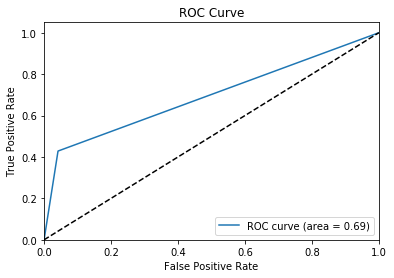

In [66]:
fpr, tpr, _ = roc_curve(y_test, y_p)
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Logistic Regression 

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(C=10,max_iter=750,random_state=52)
logreg.fit(x_train, y_train)
logreg.fit(X_train_u, y_train_u)
logreg.fit(X_train_d, y_train_d)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=750, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=52, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=52)
modelCV = LogisticRegression()
scoring = 'accuracy'
results1 = model_selection.cross_val_score(modelCV, x_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy on original dataset: %.3f" % (results1.mean()))
results2 = model_selection.cross_val_score(modelCV, X_train_u, y_train_u, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy on upsampled dataset: %.3f" % (results2.mean()))
results3 = model_selection.cross_val_score(modelCV, X_train_d, y_train_d, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy on downsampled dataset: %.3f" % (results3.mean()))

10-fold cross validation average accuracy on original dataset: 0.873
10-fold cross validation average accuracy on upsampled dataset: 0.725
10-fold cross validation average accuracy on downsampled dataset: 0.721


### Although accuracy is higher on the original imbalanced dataset, its not a reliable accuracy.
### As the accuracy on upsampled data is around 73%, we can conclude here that Logistic regression isn't a very good model for this dataset compared to Random Forest

In [24]:
from sklearn.metrics import confusion_matrix
lreg1=LogisticRegression(random_state=52,C=10)
lreg2=LogisticRegression(random_state=52,C=10)
lreg3=LogisticRegression(random_state=52,C=10)
lreg1.fit(x_train,y_train)
lreg2.fit(X_train_u,y_train_u)
lreg3.fit(X_train_d,y_train_d)
model1=lreg1
model2=lreg2
model3=lreg3
y_pred1=model1.predict(x_test)
y_pred2=model2.predict(x_test)
y_pred3=model3.predict(x_test)
cm_df1 = pd.DataFrame(confusion_matrix(y_test, y_pred1).T, index=model.classes_,
                     columns=model.classes_)
cm_df1.index.name = 'Predicted'
cm_df1.columns.name = 'True'
cm_df2 = pd.DataFrame(confusion_matrix(y_test, y_pred2).T, index=model.classes_,
                     columns=model.classes_)
cm_df2.index.name = 'Predicted'
cm_df2.columns.name = 'True'
cm_df3 = pd.DataFrame(confusion_matrix(y_test, y_pred3).T, index=model.classes_,
                     columns=model.classes_)
cm_df3.index.name = 'Predicted'
cm_df3.columns.name = 'True'
print(cm_df1)
print(cm_df2)
print(cm_df3)

True         0   1
Predicted         
0          310  42
1            2  14
True         0   1
Predicted         
0          234  13
1           78  43
True         0   1
Predicted         
0          216  12
1           96  44


ROC AUC on original dataset: 0.62
ROC AUC on upsampled dataset: 0.76
ROC AUC on downsampled dataset: 0.74


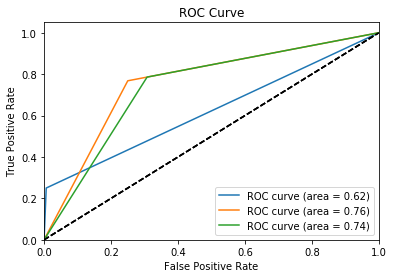

In [30]:
from sklearn.metrics import roc_curve, auc
fpr1, tpr1, _ = roc_curve(y_test, y_pred1)
fpr2, tpr2, _ = roc_curve(y_test, y_pred2)
fpr3, tpr3, _ = roc_curve(y_test, y_pred3)
# Calculate the AUC
roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
roc_auc3 = auc(fpr3, tpr3)
print('ROC AUC on original dataset: %0.2f' % roc_auc1)
print('ROC AUC on upsampled dataset: %0.2f' % roc_auc2)
print('ROC AUC on downsampled dataset: %0.2f' % roc_auc3)
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr1, tpr1, label='ROC curve (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.plot(fpr2, tpr2, label='ROC curve (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.plot(fpr3, tpr3, label='ROC curve (area = %0.2f)' % roc_auc3)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### From ROC-AUC accuracy we notice here that although accuracy was comparatively lesser on the balanced dataset, model performance was a better one compared to others 

In [34]:
data = {'Model':['RandomForest (original dataset)','RandomForest (Upsampled Dataset)','RandomForest(Downsampled Dataset)','ANN','Logistic Regression (Original Dataset)','Logistic Regression (Upsampled Dataset)', 'Logistic Regression (Downsampled dataset)'],
       'Accuracy':['45.02','98.70','77.58','86.12','87.3','72.5','72.1'],'ROC-AUC Accuracy':['-','62','-','69','62','76','74']}
df = pd.DataFrame(data)
#print('------------------CLASSIFICATION REPORT---------------------')
#df